In [3]:
import os, glob, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_folder = r"D:\Analyzed_CellBio\Stam\Lac_Ms_live\Compiled_analysis\cells"

control_files = [f for f in glob.glob(data_folder + os.sep +'*') if 'analysis_cell' in f]

control_df = [pd.read_excel(f, index_col = None) for f in control_files]

In [5]:
control_df[0]

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,2.566185,2.677769,2.652622,2.50689,3.367158,2.845113,2.809905,3.592181,3.806639,4.357415,...,yes_9.00304847188765,yes_7.344179844056233,yes_6.542776152399362,yes_6.748064587752494,yes_7.138271656837022,yes_7.393258750293951,6.698979,6.811552,7.367357,6.611527


In [30]:
print(len(control_files))
print(len(filtered_df))

cellname_list =[]

for _f in control_files:

    cellname = _f.split('\\')[-1].split('.xlsx')[0]
    
    cellname_list.append(cellname)
    
cellname_list    


lines = cellname_list    
with open(data_folder + os.sep + 'all_cell_17_list.txt', 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')

18
18


In [26]:
_test = True


normalized_measurement_dict_list = []
normalized_measurement_df_list = []

lac_based_ms2 = []
std_based_ms2 = []

if _test:
    
    for index, df in enumerate(control_df[:]):
        
        
        print(f'--processing dataframe #{index}.')
        all_timepoints = df.columns
        
        mitosis_timepoints = []
        for _t in all_timepoints:
            if df[_t][0] == 'mitosis':
                mitosis_timepoints.append(_t)
        
        mitosis_start = int(mitosis_timepoints [0])
        mitosis_end = int(mitosis_timepoints [-1])
        
        normalized_measurement_dict = {}
        
        for _t in all_timepoints:
            
            _ori_time = int(_t)
            if _ori_time <mitosis_start:
                _new_time = _ori_time - mitosis_start
            elif _ori_time >mitosis_end:
                _new_time = _ori_time - mitosis_end + 4 # mitosis duration
                
            ms2_value = df[_t][0]
            #print(ms2_value)
            if type(ms2_value) is np.float64:
                normalized_measurement_dict[_new_time] = ms2_value
                
                if _new_time >=5 and _new_time <=60:
                    lac_based_ms2.append(ms2_value)
                    
                    
            elif type(ms2_value) is str:
                if 'yes' in ms2_value:
                    ms2_value= np.float64(ms2_value.split('yes_')[1])
                    normalized_measurement_dict[_new_time] = ms2_value
                    
                    if _new_time >=5 and _new_time <=60:
                        std_based_ms2.append(ms2_value)
                        
                        
                elif 'no' in ms2_value:
                    ms2_value=1.7
                    normalized_measurement_dict[_new_time] = ms2_value
                elif 'mitosis' in ms2_value:
                    ms2_value=0
                    normalized_measurement_dict[0] = ms2_value
                    normalized_measurement_dict[1] = ms2_value
                    normalized_measurement_dict[2] = ms2_value
                    normalized_measurement_dict[3] = ms2_value
                    normalized_measurement_dict[4] = ms2_value
            
            # add empty for 200 timpoints in total
            valid_timepoints = normalized_measurement_dict.keys()
            empty_timepoints = [_t for _t in range(-100,100) if _t not in valid_timepoints]
            for _t in empty_timepoints:
                normalized_measurement_dict[_t] = np.nan
                
            normalized_measurement_df = pd.DataFrame(normalized_measurement_dict,index=[0])  
            normalized_measurement_df = normalized_measurement_df[range(-100,100)]
            
        normalized_measurement_dict_list.append(normalized_measurement_dict)
        normalized_measurement_df_list.append(normalized_measurement_df)
                
combined_df = pd.concat(normalized_measurement_df_list)

--processing dataframe #0.
--processing dataframe #1.
--processing dataframe #2.
--processing dataframe #3.
--processing dataframe #4.
--processing dataframe #5.
--processing dataframe #6.
--processing dataframe #7.
--processing dataframe #8.
--processing dataframe #9.
--processing dataframe #10.
--processing dataframe #11.
--processing dataframe #12.
--processing dataframe #13.
--processing dataframe #14.
--processing dataframe #15.
--processing dataframe #16.
--processing dataframe #17.


In [25]:
np.min(std_based_ms2)

1.9083024072904304

436
72
MW comparision: 6.745023577224307e-14


<IPython.core.display.Javascript object>


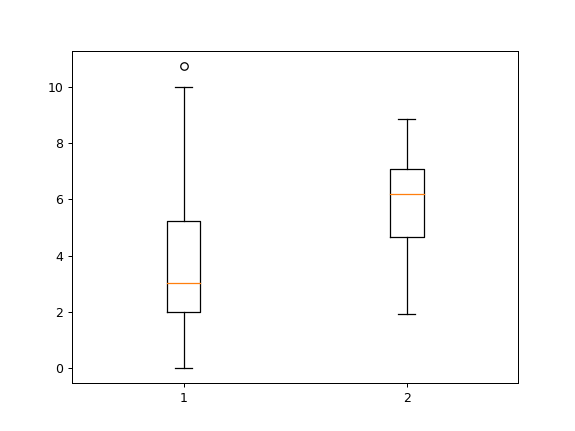

c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'whiskers': [<matplotlib.lines.Line2D at 0x27b5429d888>,
 'caps': [<matplotlib.lines.Line2D at 0x27b5429db88>,
 'boxes': [<matplotlib.lines.Line2D at 0x27b532340c8>,
 'medians': [<matplotlib.lines.Line2D at 0x27b54292c08>,
 'fliers': [<matplotlib.lines.Line2D at 0x27b542b58c8>,
 'means': []}

In [24]:
%matplotlib notebook
#plt.boxplot([lac_based_ms2, std_based_ms2])

lac_based_ms2= np.array(lac_based_ms2)
std_based_ms2= np.array(std_based_ms2)


lac_based_ms2 = lac_based_ms2[np.logical_not(np.isnan(lac_based_ms2))]

print(len(lac_based_ms2))

print(len(std_based_ms2))


from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(lac_based_ms2,std_based_ms2)

print(f"MW comparision: {p1}")


plt.boxplot([lac_based_ms2,std_based_ms2])


In [29]:
combined_df.to_excel(data_folder + os.sep+'combined_analysis_cell_17.xlsx', index=False)

In [9]:


#combined_df

In [27]:
filtered_df = combined_df.loc[:,range(-20,50)]


<IPython.core.display.Javascript object>


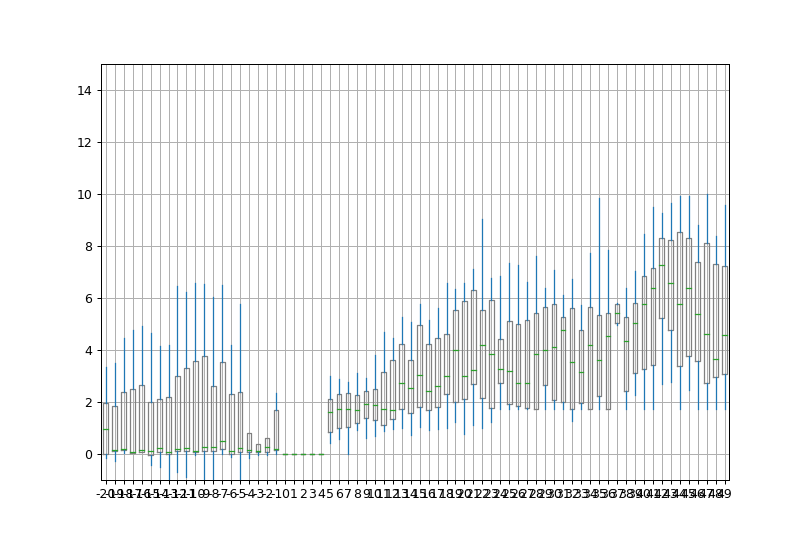

c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(-1, 15)

In [28]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(9, 6))



boxprops = dict(linestyle='-', linewidth=1, color='gray')

medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')


meanprops = dict(linestyle='--', linewidth=5.5, color='purple')


filtered_df.boxplot(grid =True,
                    notch = False,
                    showcaps=False,
                    showfliers=False,
                    
                   #showbox =False
                    boxprops =boxprops,
                    meanprops= meanprops,
    
                   )


ax.set_ylim([-1, 15])

In [13]:
len(filtered_df)

18